In [1]:
import pandas as pd

In [2]:
df_camp_members = pd.read_csv('/home/darshan/Documents/Vonage 2024-Nov-13/SFDC/Campaign Members in Field Mktg Campaigns.csv')

df_camp_members.head(1)

/tmp/ipykernel_41951/2929476348.py:1: DtypeWarning: Columns (13,18,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df_camp_members = pd.read_csv('/home/darshan/Documents/Vonage 2024-Nov-13/SFDC/Campaign Members in Field Mktg Campaigns.csv')


,Salesforce Instance,Campaign ID,Campaign Name,Campaign Type,SubType,Campaign Status,Business Group,Member Type,Member Status,Related Record ID,...,Email,Related Record Owner,Account Owner,Address,City,State (text only),Zip/Postal Code,Country (text only),Geo-Region,Region
0,VCC,701D0000000KnEv,VCC AppExchange,Digital,Web,In Progress,NaN,Lead,Watched Demo,00Q4G00001IRgQH,...,matt@mattparker.ca,Anastasia Best,NaN,NaN,NaN,British Columbia,NaN,Canada,NAM,US & Canada


In [3]:
df_camp_members.shape

(189231, 31)

In [51]:
df_call = pd.read_csv('/home/darshan/Documents/Vonage 2024-Nov-13/Outreach/Calls_2024-11-04.csv', low_memory=False)

df_call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37213 entries, 0 to 37212
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     37213 non-null  int64  
 1   State                  37213 non-null  object 
 2   Created At             37213 non-null  object 
 3   Answered At            12772 non-null  object 
 4   Completed At           37213 non-null  object 
 5   Duration in Seconds    12815 non-null  float64
 6   Direction              37213 non-null  object 
 7   From                   16527 non-null  object 
 8   To                     37010 non-null  object 
 9   Outcome                0 non-null      float64
 10  Purpose                23614 non-null  object 
 11  Disposition            37213 non-null  object 
 12  Note                   13847 non-null  object 
 13  Prospect Id            36800 non-null  float64
 14  Prospect First Name    36797 non-null  object 
 15  Pr

In [5]:
df_email_clicked = pd.read_csv('/home/darshan/Documents/Vonage 2024-Nov-13/Outreach/Clicked_Mailings_2024-11-04.csv', low_memory=False)

df_email_clicked.shape

(26004, 43)

In [6]:
df_email_replied = pd.read_csv('/home/darshan/Documents/Vonage 2024-Nov-13/Outreach/Replied_Mailings_2024-11-04.csv', low_memory=False)

df_email_replied.shape

(33340, 43)

In [7]:
df_email = pd.concat([df_email_clicked, df_email_replied])
df_email.shape

(59344, 43)

In [8]:
df_email_clicked.shape[0] + df_email_replied.shape[0]

59344

In [9]:
df_count = pd.DataFrame({
    'Mail': df_camp_members['Email'].dropna().unique()
})

df_count

,Mail
0,matt@mattparker.ca
1,jmahelis@gmail.com
2,hari@meetrix.io
3,bristolyouthlacrosse@gmail.com
4,jruppenstein@aqualung.com
...,...
136230,bluephoenixpersonnel@gmail.com
136231,skater2tunerkid@yahoo.com
136232,gvchevron@gmail.com
136233,arfranklindentalgroup@gmail.com


### Unique Lead in Campaign Member: 1,36,235

In [10]:
value_count_call = df_call['Prospect Email'].value_counts(dropna=True)

df_count_call = pd.DataFrame({
    'Mail': value_count_call.index,
    'Call Count': value_count_call.values
})

df_count_call

,Mail,Call Count
0,dware@galleonvirtual.com,10
1,michael@datavoiceoptions.com,9
2,christine@anaconda-networks.com,9
3,rhauben@enetworldwide.net,9
4,trent.james@storcom.net,9
...,...,...
33157,jack.madson81@gmail.com,1
33158,cglessner@all-lines-tech.com,1
33159,karentraceymoore@gmail.com,1
33160,gavind@trusscore.com,1


### Unique Lead of Call Record: 33,162

In [11]:
value_count_mail = df_email['Prospect Email'].value_counts(dropna=True)

df_count_mail = pd.DataFrame({
    'Mail': value_count_mail.index,
    'Email Count': value_count_mail.values
})

df_count_mail

,Mail,Email Count
0,danielle.vergara@salesforce.com,85
1,customercare@vonagebusiness.com,81
2,jarroyo@talivity.com,50
3,whollar@mtconsultants.io,47
4,omarm@mkoadvisors.com,47
...,...,...
24137,yuri.klyuchko@gmail.com,1
24138,toby@digitalrecruitmentcompany.com,1
24139,hoangnguyen@lexor.com,1
24140,jp@jphayesinsurance.com,1


### Unique Lead of Mail Record: 24,142

In [12]:
df_count = pd.merge(df_count, df_count_call, how='left', on='Mail')
df_count

,Mail,Call Count
0,matt@mattparker.ca,NaN
1,jmahelis@gmail.com,NaN
2,hari@meetrix.io,NaN
3,bristolyouthlacrosse@gmail.com,NaN
4,jruppenstein@aqualung.com,NaN
...,...,...
136230,bluephoenixpersonnel@gmail.com,NaN
136231,skater2tunerkid@yahoo.com,NaN
136232,gvchevron@gmail.com,NaN
136233,arfranklindentalgroup@gmail.com,NaN


In [13]:
df_count = pd.merge(df_count, df_count_mail, how='left', on='Mail')
df_count

,Mail,Call Count,Email Count
0,matt@mattparker.ca,NaN,NaN
1,jmahelis@gmail.com,NaN,NaN
2,hari@meetrix.io,NaN,NaN
3,bristolyouthlacrosse@gmail.com,NaN,NaN
4,jruppenstein@aqualung.com,NaN,NaN
...,...,...,...
136230,bluephoenixpersonnel@gmail.com,NaN,NaN
136231,skater2tunerkid@yahoo.com,NaN,NaN
136232,gvchevron@gmail.com,NaN,NaN
136233,arfranklindentalgroup@gmail.com,NaN,NaN


In [14]:
df_count.sort_values(by=['Call Count', 'Email Count'], ascending=False)

,Mail,Call Count,Email Count
19376,mailys@eversure.com,7.0,NaN
98904,ajcross@five-starbank.com,7.0,NaN
44440,amir.bercovitz@sodexo.com,6.0,4.0
29787,alan.ritchie@royallondon.com,6.0,1.0
45816,info@buzzincc.com,6.0,1.0
...,...,...,...
136230,bluephoenixpersonnel@gmail.com,NaN,NaN
136231,skater2tunerkid@yahoo.com,NaN,NaN
136232,gvchevron@gmail.com,NaN,NaN
136233,arfranklindentalgroup@gmail.com,NaN,NaN


In [15]:
import matplotlib.pyplot as plt
import locale

# Set locale for Indian number formatting
locale.setlocale(locale.LC_ALL, 'en_IN.UTF-8')

'en_IN.UTF-8'

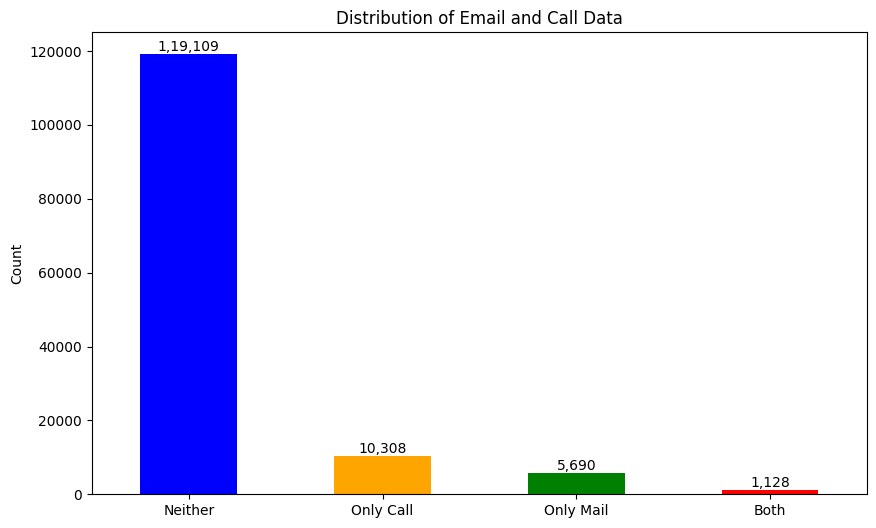

In [16]:
# Categorize rows
def categorize(row):
    if pd.notna(row['Call Count']) and pd.notna(row['Email Count']):
        return 'Both'
    elif pd.notna(row['Call Count']):
        return 'Only Call'
    elif pd.notna(row['Email Count']):
        return 'Only Mail'
    else:
        return 'Neither'

df_count['Category'] = df_count.apply(categorize, axis=1)

# Count occurrences of each category
category_counts = df_count['Category'].value_counts()

# Increase figure size
plt.figure(figsize=(10, 6))  # Width: 10, Height: 6

# Plot the bar chart
ax = category_counts.plot(kind='bar', color=['blue', 'orange', 'green', 'red'])

# Add title
plt.xlabel('')
plt.ylabel('Count')
plt.title('Distribution of Email and Call Data')
plt.xticks(rotation=0)

# Add the count values on top of each bar with Indian formatting
for i, count in enumerate(category_counts):
    formatted_count = locale.format_string("%d", count, grouping=True)
    ax.text(i, count + 0.1, formatted_count, ha='center', va='bottom', fontsize=10, color='black')

plt.show()

In [17]:
df_lead_with_converted_information = pd.read_csv('/home/darshan/Documents/Lead with Converted Information.csv', encoding="latin1")

df_lead_with_converted_information.shape

/tmp/ipykernel_41951/3711700130.py:1: DtypeWarning: Columns (21,23,24,26,27,28,29,31,32,33,34,35,36,37,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df_lead_with_converted_information = pd.read_csv('/home/darshan/Documents/Lead with Converted Information.csv', encoding="latin1")


(550186, 42)

In [18]:
df_lead_with_converted_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550186 entries, 0 to 550185
Data columns (total 42 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Campaign ID                        550186 non-null  object 
 1   Campaign Name                      550186 non-null  object 
 2   Campaign Type                      547168 non-null  object 
 3   SubType                            458628 non-null  object 
 4   Business Group                     546723 non-null  object 
 5   Member First Associated Date       550186 non-null  object 
 6   Member First Responded Date        317045 non-null  object 
 7   Member Status                      550180 non-null  object 
 8   Member Type                        550186 non-null  object 
 9   Responded                          550186 non-null  int64  
 10  Company / Account                  549779 non-null  object 
 11  Lead ID                            5501

In [19]:
df_lead_with_converted_information['Converted'].value_counts()

Converted
0    491023
1     59163
Name: count, dtype: int64

In [34]:
df_lead_with_converted_information['Created Date'].head()

0     6/1/2023
1    9/20/2023
2    3/16/2023
3     1/8/2024
4    9/20/2023
Name: Created Date, dtype: object

In [36]:
# Convert the 'date' column to datetime
df_lead_with_converted_information['Created Date'] = pd.to_datetime(df_lead_with_converted_information['Created Date'], format='%m/%d/%Y')

# Filter for rows where the year is 2023 or 2024
filtered_df_lead_with_converted_information = df_lead_with_converted_information[df_lead_with_converted_information['Created Date'].dt.year.isin([2023, 2024])]

filtered_df_lead_with_converted_information.shape

(339005, 42)

In [37]:
df_camp_members_filtered = df_camp_members[df_camp_members['Email'].notnull()][['Email']]
df_camp_members_filtered

,Email
0,matt@mattparker.ca
1,jmahelis@gmail.com
2,hari@meetrix.io
3,bristolyouthlacrosse@gmail.com
4,jruppenstein@aqualung.com
...,...
189226,bluephoenixpersonnel@gmail.com
189227,skater2tunerkid@yahoo.com
189228,gvchevron@gmail.com
189229,arfranklindentalgroup@gmail.com


In [21]:
df_lead_with_converted_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550186 entries, 0 to 550185
Data columns (total 42 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Campaign ID                        550186 non-null  object 
 1   Campaign Name                      550186 non-null  object 
 2   Campaign Type                      547168 non-null  object 
 3   SubType                            458628 non-null  object 
 4   Business Group                     546723 non-null  object 
 5   Member First Associated Date       550186 non-null  object 
 6   Member First Responded Date        317045 non-null  object 
 7   Member Status                      550180 non-null  object 
 8   Member Type                        550186 non-null  object 
 9   Responded                          550186 non-null  int64  
 10  Company / Account                  549779 non-null  object 
 11  Lead ID                            5501

In [22]:
df_lead_with_converted_information_filtered = df_lead_with_converted_information[df_lead_with_converted_information['Email'].notnull()][['Email', 'Converted']]
df_lead_with_converted_information_filtered

,Email,Converted
0,disha.de@nyalazone.com,0
1,nidhi@touchpointsinc.com,0
2,mujtaba.pasha@infopro-digital.com,0
3,julie.lewismackay@hrgo.co.uk,0
4,slovely@3b2solutions.com,0
...,...,...
550181,tanushri@cyntexa.com,0
550182,marco.simon@hilton.com,0
550183,mhamza.siddiqui@gmail.com,0
550184,michelle.magsarili@gmail.com,0


In [23]:



# Merge the two datasets on 'email' with an inner join
result = pd.merge(df_camp_members_filtered, df_lead_with_converted_information, on='Email', how='inner')

# Final DataFrame with only the 'email' and 'converted' columns
result = result[['Email', 'Converted']]

result = result.drop_duplicates(subset=['Email', 'Converted'])

print(result)

                                  Email  Converted
0                    jmahelis@gmail.com          0
2                       hari@meetrix.io          0
4        bristolyouthlacrosse@gmail.com          0
7             jruppenstein@aqualung.com          0
9          sebastiangielser23@gmail.com          0
...                                 ...        ...
344822       movaldoggrooming@yahoo.com          1
344827   bluephoenixpersonnel@gmail.com          1
344828        skater2tunerkid@yahoo.com          1
344829  arfranklindentalgroup@gmail.com          1
344831            stella@bikesultan.com          1

[118021 rows x 2 columns]


In [24]:
result['Email'].nunique()

116069

In [25]:
result['Email'].isnull().sum()

np.int64(0)

In [26]:
result['Converted'].isnull().sum()

np.int64(0)

In [27]:
result['Converted'].value_counts()

Converted
0    98362
1    19659
Name: count, dtype: int64

In [28]:
df_camp_members.isnull().sum()

Salesforce Instance                  0
Campaign ID                          0
Campaign Name                        0
Campaign Type                     3213
SubType                          63598
Campaign Status                      0
Business Group                   17227
Member Type                          0
Member Status                        0
Related Record ID                    0
Member First Associated Date         0
Member Status Update Date            0
Member First Responded Date      55061
Account ID                      179347
Company                            337
Responded                            0
First Name                         224
Last Name                            0
Member Name                      95177
Title                            79698
Phone                            36233
Email                              219
Related Record Owner                 0
Account Owner                   144174
Address                         112698
City                     

In [29]:
df_camp_members['Email'].nunique()

136235

In [30]:
df_camp_members['Email'].str.lower().str.strip().nunique()

136235

In [31]:
df_lead_with_converted_information['Email'].nunique()

370666

In [32]:
df_lead_with_converted_information['Email'].str.lower().str.strip().nunique()

370666

In [39]:
df_camp_members.shape

(189231, 31)

In [41]:
df_lead_with_converted_information_filtered.shape

(549334, 2)

In [44]:
df_lead_with_converted_information_filtered.value_counts()

Email                            Converted
phughston@grubbproperties.com    1            43
metricsmanager1@gmail.com        1            20
jforster@monument.health         0            18
jessesmithbiz@gmail.com          1            16
favreaub@link75.org              0            15
                                              ..
zzpuuwlzmynfktooiz@kvhrr.com     0             1
zzqaks0613ta1@zzqaks0613ta1.com  1             1
zzred@test.com                   0             1
zzredcollor2@test.com            0             1
001maryjon@gmail.com             0             1
Name: count, Length: 374457, dtype: int64

In [45]:
df_lead_with_converted_information_filtered_unique = df_lead_with_converted_information_filtered.drop_duplicates(subset='Email', keep='first')

df_lead_with_converted_information_filtered_unique.shape

(370666, 2)

In [49]:
df_merge = pd.merge(df_camp_members, df_lead_with_converted_information_filtered_unique[['Email', 'Converted']], on='Email', how='left')

df_merge.shape

(189231, 32)

In [50]:
df_merge[['Converted']].value_counts()

Converted
0.0          141196
1.0           22168
Name: count, dtype: int64